In [1]:
library("geneplotter")
library("ggplot2")
library("vsn")
library("genefilter")
library("DESeq2")
getwd()

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Welcome to Bioconductor

    Vignettes contain intro

[1] "/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples"

In [2]:
meta_path = "metadata.csv"
sampleTable = read.csv(meta_path, row.names = 1)
sampleTable$sample_type=factor(sampleTable$sample_type)
sampleTable$sample_type <- relevel(sampleTable$sample_type, ref="healthy")
sampleTable

,sample_type,sample_name,path
H1,healthy,H1,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H1.txt
H2,healthy,H2,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H2.txt
H3,healthy,H3,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H3.txt
H4,healthy,H4,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H4.txt
H5,healthy,H5,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H5.txt
H6,healthy,H6,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H6.txt
H7,healthy,H7,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H7.txt
H8,healthy,H8,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H8.txt
UC1,uc,UC1,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/UC1.txt
UC2,uc,UC2,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/UC2.txt


In [3]:
countData = read.csv("out/df_filt.csv", row.names = 1)
locusTable = read.csv("out/locus_df.csv", row.names = 1)
sampleTable = sampleTable[colnames(countData),]

In [4]:
dds = DESeqDataSetFromMatrix(countData, colData = sampleTable, ~ sample_type)
dds = DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 1375 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [5]:
head(counts(dds))

,H1,H2,H3,H4,H5,H6,H7,H8,UC1,UC11,UC15,UC2,UC23,UC4,UC5,UC6,UC8,UC9
202956,13,5,10,7,4,6,8,2,13,0,7,8,6,12,3,0,2,8
209005,25,31,27,0,8,24,10,46,35,13,23,50,12,14,31,0,17,25
217964,6,3,2,6,0,6,4,4,0,0,0,3,1,2,0,0,1,2
248190,3,2,1,0,0,0,2,6,3,3,2,11,0,0,7,0,0,0
302579,4,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0
318873,3,17,2,6,0,17,1,0,0,0,7,6,0,3,0,0,0,0


In [26]:
dim(counts(dds))

[1] 14618    18

In [6]:
sampleTable

,sample_type,sample_name,path
H1,healthy,H1,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H1.txt
H2,healthy,H2,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H2.txt
H3,healthy,H3,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H3.txt
H4,healthy,H4,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H4.txt
H5,healthy,H5,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H5.txt
H6,healthy,H6,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H6.txt
H7,healthy,H7,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H7.txt
H8,healthy,H8,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H8.txt
UC1,uc,UC1,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/UC1.txt
UC11,uc,UC11,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/UC11.txt


In [7]:
#mcols(dds)<-cbind(mcols(dds),locusTable)
save(dds, file = "out/dds")

In [17]:
res = results(dds, contrast=c("sample_type", "healthy", "uc"))
summary(res)


out of 14531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 7, 0.048% 
LFC < 0 (down)   : 11, 0.076% 
outliers [1]     : 0, 0% 
low counts [2]   : 9661, 66% 
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [11]:
?results

In [14]:
res = cbind(res, locusTable)
save(res, file = "out/res_probe_unenriched")

In [15]:
resOrdered <- res[order(res$padj),]
write.csv(as.data.frame(resOrdered),file="out/probe_unenriched_deseq_results.csv")

In [22]:
resultsNames(dds)

[1] "Intercept"                 "sample_type_uc_vs_healthy"

In [24]:
resLFC <- lfcShrink(dds, coef="sample_type_uc_vs_healthy")

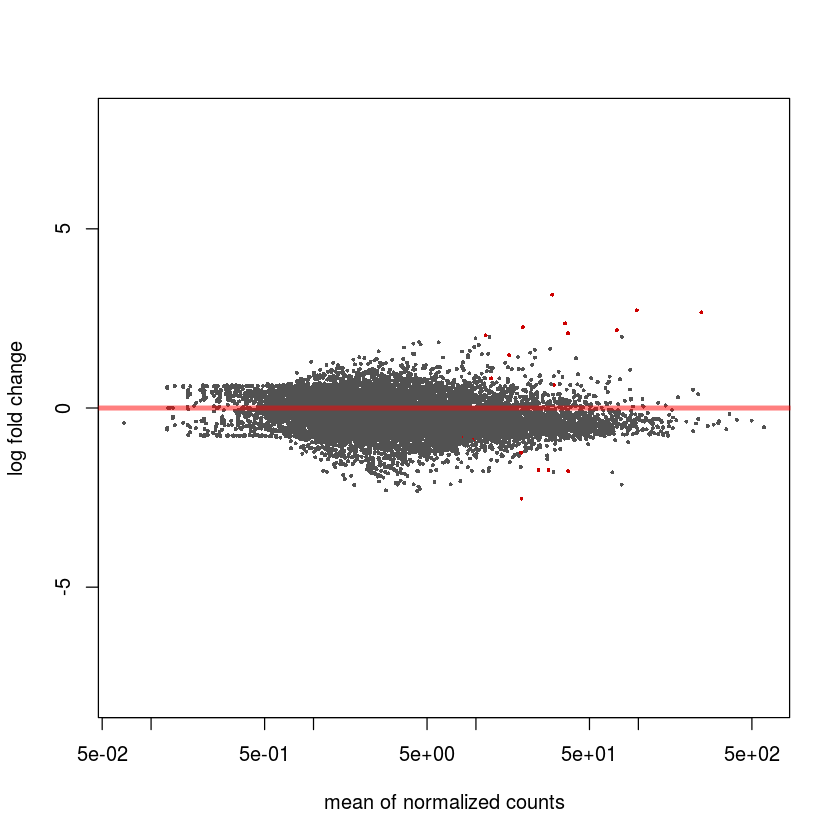

In [25]:
plotMA(resLFC, ylim=c(-8,8))